<div align="center">

<h3>BỘ GIÁO DỤC VÀ ĐÀO TẠO</h3>
<h3>TRƯỜNG ĐẠI HỌC ĐẠI HỌC MỎ - ĐỊA CHẤT<h3>

---

<h1>ĐỒ ÁN TỐT NGHIỆP</h1>

<h3>NGÀNH CÔNG NGHỆ THÔNG TIN CHƯƠNG TRÌNH CHẤT LƯỢNG CAO</h3>

<h2>Đề tài: Nghiên cứu, ứng dụng mô hình học sâu hỗ trợ chẩn đoán bất thường xương chi trên qua ảnh chụp X‑quang</h2>

</div>

---

**Họ và tên sinh viên:** Nguyễn Văn Huy 

**Mã sinh viên:** 2121050061

**Lớp:** DCCTCLC66A1

**Giảng viên hướng dẫn:** ThS. Đặng Văn Nam

--- 
<div align="center">

<h4>Hà Nội, 12/2025</h4>

</div>


# 1. Giới thiệu về đề tài

Đề tài nghiên cứu, ứng dụng mô hình học sâu hỗ trợ chẩn đoán bất thường xương chi trên qua ảnh chụp X-quang được thực hiện với các mục tiêu chính:

- **Lý do:** Chẩn đoán bất thường xương chi từ ảnh X-quang là một nhiệm vụ quan trọng trong y tế, nhưng đòi hỏi kinh nghiệm cao của các bác sĩ chuyên khoa. Ứng dụng mô hình học sâu có thể hỗ trợ tăng độ chính xác và tốc độ chẩn đoán.

- **Mục tiêu chính:**
    - Xây dựng mô hình học sâu (CNN, YOLO, ...) để phân loại và phát hiện bất thường từ ảnh X-quang
    - Đạt được độ chính xác đáng kể trong dự đoán
    - Phát triển giao diện web thân thiện cho bác sĩ
    - So sánh hiệu năng giữa các mô hình khác nhau



#  2. Chuẩn bị dữ liệu

## 2.1 Giới thiệu về bộ dữ liệu: MURA: MSK Xrays

MURA (musculoskeletal radiographs) là một tập dữ liệu lớn chứa ảnh X-quang xương. Các thuật toán được yêu cầu xác định xem một bộ ảnh X-quang có bình thường hay bất thường. 

Các bệnh về cơ xương khớp ảnh hưởng đến hơn 1,7 tỷ người trên toàn thế giới và là nguyên nhân phổ biến nhất gây ra đau đớn và khuyết tật nặng nề, kéo dài lâu dài, với 30 triệu lượt đến khoa cấp cứu hàng năm và ngày càng tăng. Chúng tôi hy vọng rằng tập dữ liệu này có thể dẫn đến những tiến bộ đáng kể trong công nghệ hình ảnh y tế, giúp chẩn đoán ở mức độ chuyên gia, nhằm cải thiện khả năng tiếp cận dịch vụ chăm sóc sức khỏe ở những nơi mà khả năng tiếp cận các bác sĩ chuyên khoa hạn chế. 

MURA là một trong những tập dữ liệu hình ảnh X-quang công khai lớn nhất. Chúng tôi công khai tập dữ liệu này cho cộng đồng và tổ chức một cuộc thi để xem các mô hình của bạn có thể hoạt động cũng tốt như các bác sĩ chuyên khoa trên nhiệm vụ này hay không.

**Giấy phép:** [Stanford University Dataset Research Use Agreement](https://stanfordaimi.azurewebsites.net/datasets/3e00d84b-d86e-4fed-b2a4-bfe3effd661b)

## 2.2 Cấu trúc bộ dữ liệu

In [1]:
# Khai báo thư viện
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
# Các đường dẫn
base_dir = "data/MURA-v1.1/"
train_dir = base_dir + "train/"
val_dir = base_dir + "valid/"

# In ra các đường dẫn để kiểm tra
print("Đường dẫn các thư mục:")
print(base_dir)
print(train_dir)
print(val_dir)

Đường dẫn các thư mục:
data/MURA-v1.1/
data/MURA-v1.1/train/
data/MURA-v1.1/valid/


In [3]:
# Đường dẫn tới các thư mục hình ảnh
# Train
train_elbow_dir = train_dir + "XR_ELBOW/"
train_finger_dir = train_dir + "XR_FINGER/"  
train_forearm_dir = train_dir + "XR_FOREARM/"
train_hand_dir = train_dir + "XR_HAND/"
train_humerus_dir = train_dir + "XR_HUMERUS/"
train_shoulder_dir = train_dir + "XR_SHOULDER/"
train_wrist_dir = train_dir + "XR_WRIST/"

# Validation
val_elbow_dir = val_dir + "XR_ELBOW/"
val_finger_dir = val_dir + "XR_FINGER/"  
val_forearm_dir = val_dir + "XR_FOREARM/"
val_hand_dir = val_dir + "XR_HAND/"
val_humerus_dir = val_dir + "XR_HUMERUS/"
val_shoulder_dir = val_dir + "XR_SHOULDER/"
val_wrist_dir = val_dir + "XR_WRIST/"

# In ra các đường dẫn để kiểm tra
print("\nĐường dẫn các thư mục hình ảnh:")
print("Train:")
print(train_elbow_dir)
print(train_finger_dir)
print(train_forearm_dir)
print(train_hand_dir)
print(train_humerus_dir)
print(train_shoulder_dir)    
print(train_wrist_dir)
print("\nValidation:")
print(val_elbow_dir)
print(val_finger_dir)
print(val_forearm_dir)
print(val_hand_dir)
print(val_humerus_dir)
print(val_shoulder_dir)
print(val_wrist_dir)



Đường dẫn các thư mục hình ảnh:
Train:
data/MURA-v1.1/train/XR_ELBOW/
data/MURA-v1.1/train/XR_FINGER/
data/MURA-v1.1/train/XR_FOREARM/
data/MURA-v1.1/train/XR_HAND/
data/MURA-v1.1/train/XR_HUMERUS/
data/MURA-v1.1/train/XR_SHOULDER/
data/MURA-v1.1/train/XR_WRIST/

Validation:
data/MURA-v1.1/valid/XR_ELBOW/
data/MURA-v1.1/valid/XR_FINGER/
data/MURA-v1.1/valid/XR_FOREARM/
data/MURA-v1.1/valid/XR_HAND/
data/MURA-v1.1/valid/XR_HUMERUS/
data/MURA-v1.1/valid/XR_SHOULDER/
data/MURA-v1.1/valid/XR_WRIST/


In [4]:
# Liệt kê nội dung cấp 1 của thư mục data
print("Thư mục gốc:", os.path.abspath(base_dir))
print("\nNội dung trong thư mục data (cấp 1):")
for p in sorted(os.listdir(base_dir)):
    path = os.path.join(base_dir, p)
    print(" -", p, "(thư mục)" if os.path.isdir(path) else "(file)")
    
# Đếm số lượng file ảnh trong thư mục train/val
def count_images_in_dir(directory):
    image_extensions = ('*.png', '*.jpg', '*.jpeg', '*.bmp', '*.tiff')
    count = 0
    for ext in image_extensions:
        count += len(glob.glob(os.path.join(directory, '**', ext), recursive=True))
    return count

train_image_count = count_images_in_dir(train_dir)
print(f"Số lượng ảnh trong thư mục train: {train_image_count}")
val_image_count = count_images_in_dir(val_dir)
print(f"Số lượng ảnh trong thư mục valid: {val_image_count}")
        

Thư mục gốc: d:\DATN\data\MURA-v1.1

Nội dung trong thư mục data (cấp 1):
 - train (thư mục)
 - train_image_paths.csv (file)
 - train_labeled_studies.csv (file)
 - valid (thư mục)
 - valid_image_paths.csv (file)
 - valid_labeled_studies.csv (file)
Số lượng ảnh trong thư mục train: 36808
Số lượng ảnh trong thư mục valid: 3197


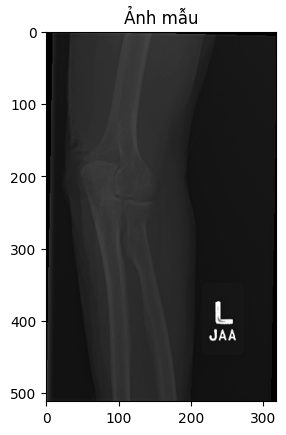

In [5]:
# Hiển thị ảnh mẫu từ thư mục trai
sample_image_path = "data/MURA-v1.1/train/XR_ELBOW/patient00011/study1_negative/image2.png"
image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title(f"Ảnh mẫu")
plt.show()

## 2.3 Khám phá bộ dữ liệu


### 2.3.1 Thống kê số lượng:

Code: Đếm số lượng ảnh Train/Val. Đếm số lượng Study (ca chụp).

Code: Đếm phân phối nhãn (Bao nhiêu Normal, bao nhiêu Abnormal).

Biểu đồ báo cáo: Bar chart so sánh số lượng Normal vs Abnormal (để biện luận việc dữ liệu có bị mất cân bằng hay không).


In [6]:
# Đọc file CSV chứa thông tin nhãn
# Các file CSV này không có header, nên đọc với header=None và đặt tên cột rõ ràng
db_train = pd.read_csv(base_dir + "train_labeled_studies.csv", header=None, names=['study', 'label'])
db_valid = pd.read_csv(base_dir + "valid_labeled_studies.csv", header=None, names=['study', 'label'])
train_image_paths = pd.read_csv(base_dir + "train_image_paths.csv", header=None, names=['path'])
val_image_paths = pd.read_csv(base_dir + "valid_image_paths.csv", header=None, names=['path'])


In [7]:
# Hiển thị thông tin cơ bản về các DataFrame
print("\nThông tin về DataFrame db_train:")
print(db_train.info())

print("\nThông tin về DataFrame db_valid:")
print(db_valid.info())


Thông tin về DataFrame db_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13457 entries, 0 to 13456
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   study   13457 non-null  object
 1   label   13457 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 210.4+ KB
None

Thông tin về DataFrame db_valid:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   study   1199 non-null   object
 1   label   1199 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.9+ KB
None


In [8]:
print("\nThông tin về DataFrame train_image_paths:")
print(train_image_paths.info())

print("\nThông tin về DataFrame val_image_paths:")
print(val_image_paths.info())


Thông tin về DataFrame train_image_paths:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36808 entries, 0 to 36807
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    36808 non-null  object
dtypes: object(1)
memory usage: 287.7+ KB
None

Thông tin về DataFrame val_image_paths:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    3197 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB
None


In [9]:
# In dữ liệu trong train_image_paths và valid_image_paths để kiểm tra
print("\nTrong train_image_paths:")
print(train_image_paths.head())
print("\nTrong valid_image_paths:")
print(val_image_paths.head())


Trong train_image_paths:
                                                path
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2  MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3  MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4  MURA-v1.1/train/XR_SHOULDER/patient00002/study...

Trong valid_image_paths:
                                                path
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [10]:
# Lọc từ trong file train_image_paths.csv 
# Gồm có positive và negative để xác định số ảnh bình thường và bất thường
# Tập train
positive_images = train_image_paths[train_image_paths['path'].str.contains('_positive', na=False)]
negative_images = train_image_paths[train_image_paths['path'].str.contains('_negative', na=False)]
counts_train_positive = len(positive_images)
counts_train_negative = len(negative_images)
counts_train_total = len(train_image_paths)
print(f"Số ảnh bất thường (positive) trong tập train: {counts_train_positive}")
print(f"Số ảnh bình thường (negative) trong tập train: {counts_train_negative}")
print(f"Tổng số ảnh trong tập train: {counts_train_total}")

# Tập valid    
positive_images_val = val_image_paths[val_image_paths['path'].str.contains('_positive', na=False)]
negative_images_val = val_image_paths[val_image_paths['path'].str.contains('_negative', na=False)]
counts_val_positive = len(positive_images_val)
counts_val_negative = len(negative_images_val)
counts_val_total = len(val_image_paths)
print(f"\nSố ảnh bất thường (positive) trong tập valid: {counts_val_positive}")
print(f"Số ảnh bình thường (negative) trong tập valid: {counts_val_negative}")
print(f"Tổng số ảnh trong tập valid: {counts_val_total}")

print(f"\nTổng số ảnh trong cả hai tập train và valid: {counts_train_total + counts_val_total}")


Số ảnh bất thường (positive) trong tập train: 14873
Số ảnh bình thường (negative) trong tập train: 21935
Tổng số ảnh trong tập train: 36808

Số ảnh bất thường (positive) trong tập valid: 1530
Số ảnh bình thường (negative) trong tập valid: 1667
Tổng số ảnh trong tập valid: 3197

Tổng số ảnh trong cả hai tập train và valid: 40005


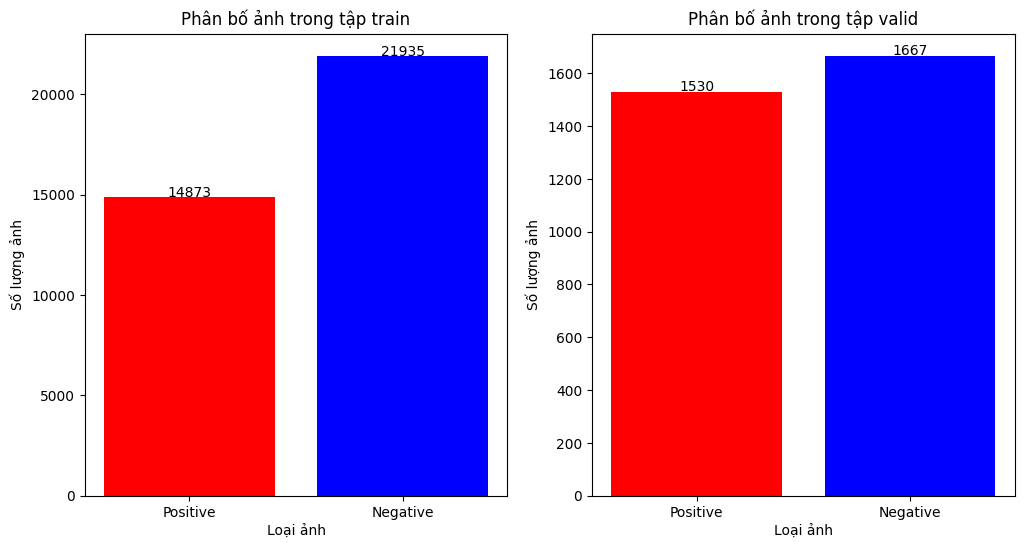

In [11]:
# Vẽ biểu đồ phân bố ảnh bình thường và bất thường
# Tập train
labels_train = ['Positive', 'Negative']
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.bar(labels_train, [counts_train_positive, counts_train_negative], color=['red', 'blue'])
plt.title('Phân bố ảnh trong tập train')
plt.xlabel('Loại ảnh')
plt.ylabel('Số lượng ảnh')
plt.text(0, counts_train_positive + 5, str(counts_train_positive), ha='center')
plt.text(1, counts_train_negative + 5, str(counts_train_negative), ha='center')

# Tập valid
labels_val = ['Positive', 'Negative']
plt.subplot(1, 2, 2)
plt.bar(labels_val, [counts_val_positive, counts_val_negative], color=['red', 'blue'])
plt.title('Phân bố ảnh trong tập valid')
plt.xlabel('Loại ảnh')
plt.ylabel('Số lượng ảnh')
plt.text(0, counts_val_positive + 5, str(counts_val_positive), ha='center')
plt.text(1, counts_val_negative + 5, str(counts_val_negative), ha='center')
plt.show()

### 2.3.2 Phân tích theo vùng:

Gồm 7 vùng của chi trên: khủy tay (elbow), ngón tay (finger), cẳng tay (forearm), bàn tay (hand), xương cánh tay (humerus), vai (shoulder), và cổ tay (wrist).





Số lượng ảnh theo từng loại trong 36808 ảnh tập train:
 - ELBOW: 4931 ảnh
 - FINGER: 5106 ảnh
 - FOREARM: 1825 ảnh
 - HAND: 5543 ảnh
 - HUMERUS: 1272 ảnh
 - SHOULDER: 8379 ảnh
 - WRIST: 9752 ảnh

Số lượng ảnh bất thường (positive) theo từng loại trong tập train:
 - ELBOW: 2006 ảnh
 - FINGER: 1968 ảnh
 - FOREARM: 661 ảnh
 - HAND: 1484 ảnh
 - HUMERUS: 599 ảnh
 - SHOULDER: 4168 ảnh
 - WRIST: 3987 ảnh

Số lượng ảnh bình thường (negative) theo từng loại trong tập train:
 - ELBOW: 2925 ảnh
 - FINGER: 3138 ảnh
 - FOREARM: 1164 ảnh
 - HAND: 4059 ảnh
 - HUMERUS: 673 ảnh
 - SHOULDER: 4211 ảnh
 - WRIST: 5765 ảnh


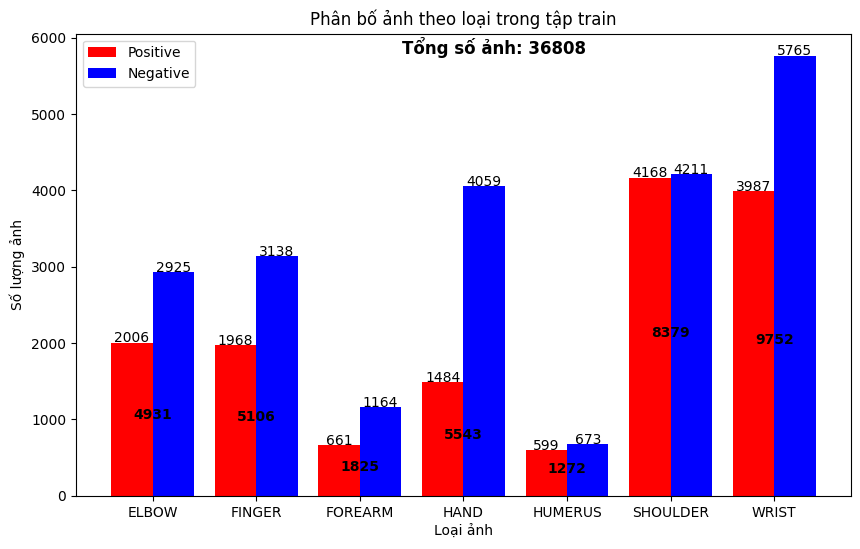

In [12]:
# Đếm số lượng ảnh của từng loại 
# 'ELBOW', 'FINGER', 'FOREARM', 'HAND', 'HUMERUS', 'SHOULDER', 'WRIST'
# trong file train_image_paths.csv và valid_image_paths.csv
# Tập train
types = ['ELBOW', 'FINGER', 'FOREARM', 'HAND', 'HUMERUS', 'SHOULDER', 'WRIST']
train_type_counts = {}
for t in types:
    count = train_image_paths['path'].str.contains(f'XR_{t}', na=False).sum()
    train_type_counts[t] = count
print(f"\nSố lượng ảnh theo từng loại trong {len(train_image_paths)} ảnh tập train:")
for t, c in train_type_counts.items():
    print(f" - {t}: {c} ảnh")

# Số lượng bất thường, bình thường theo từng loại trong tập train
train_positive_counts = {}
train_negative_counts = {}
for t in types:
    positive_count = train_image_paths[(train_image_paths['path'].str.contains(f'XR_{t}', na=False))
                          & (train_image_paths['path'].str.contains('_positive', na=False))].shape[0]
    negative_count = train_image_paths[(train_image_paths['path'].str.contains(f'XR_{t}', na=False))
                            & (train_image_paths['path'].str.contains('_negative', na=False))].shape[0]
    train_positive_counts[t] = positive_count
    train_negative_counts[t] = negative_count
print(f"\nSố lượng ảnh bất thường (positive) theo từng loại trong tập train:")
for t, c in train_positive_counts.items():
    print(f" - {t}: {c} ảnh")
print(f"\nSố lượng ảnh bình thường (negative) theo từng loại trong tập train:")
for t, c in train_negative_counts.items():
    print(f" - {t}: {c} ảnh")

# Biểu đồ thống kê tập train
labels = types
positive_counts = [train_positive_counts[t] for t in types]
negative_counts = [train_negative_counts[t] for t in types] 
x = range(len(types))
plt.figure(figsize=(10,6))
plt.bar(x, positive_counts, width=0.4, label='Positive', color='red', align='center')
plt.bar([i + 0.4 for i in x], negative_counts, width=0.4, label='Negative', color='blue', align='center')
plt.xlabel('Loại ảnh')
plt.ylabel('Số lượng ảnh')
plt.title('Phân bố ảnh theo loại trong tập train')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.texts = []
for i in x:
    plt.text(i, positive_counts[i] + 5, str(positive_counts[i]), ha='center')
    plt.text(i + 0.4, negative_counts[i] + 5, str(negative_counts[i]), ha='center')
# tổng
plt.text(3.5, max(max(positive_counts), max(negative_counts)) + 20, 
         f"Tổng số ảnh: {counts_train_total}", ha='center', fontsize=12, fontweight='bold')
# tổng từng loại
for i in x:
    total_count = positive_counts[i] + negative_counts[i]
    plt.text(i + 0.2, min(positive_counts[i], negative_counts[i])/2, 
             total_count, ha='center', fontsize=10, fontweight='bold')
plt.show()


Số lượng ảnh theo từng loại trong 3197 ảnh tập valid:
 - ELBOW: 465 ảnh
 - FINGER: 461 ảnh
 - FOREARM: 301 ảnh
 - HAND: 460 ảnh
 - HUMERUS: 288 ảnh
 - SHOULDER: 563 ảnh
 - WRIST: 659 ảnh

Số lượng ảnh bất thường (positive) theo từng loại trong tập valid:
 - ELBOW: 230 ảnh
 - FINGER: 247 ảnh
 - FOREARM: 151 ảnh
 - HAND: 189 ảnh
 - HUMERUS: 140 ảnh
 - SHOULDER: 278 ảnh
 - WRIST: 295 ảnh

Số lượng ảnh bình thường (negative) theo từng loại trong tập valid:
 - ELBOW: 235 ảnh
 - FINGER: 214 ảnh
 - FOREARM: 150 ảnh
 - HAND: 271 ảnh
 - HUMERUS: 148 ảnh
 - SHOULDER: 285 ảnh
 - WRIST: 364 ảnh


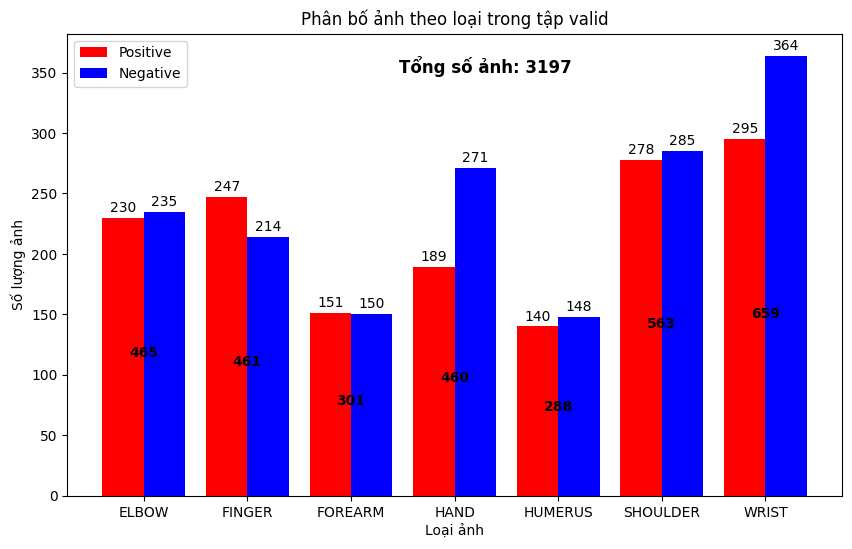

In [13]:
# tập valid
val_type_counts = {}
for t in types:
    count = val_image_paths['path'].str.contains(f'XR_{t}', na=False).sum()
    val_type_counts[t] = count
print(f"\nSố lượng ảnh theo từng loại trong {len(val_image_paths)} ảnh tập valid:")
for t, c in val_type_counts.items():
    print(f" - {t}: {c} ảnh")
# Số lượng bất thường, bình thường theo từng loại trong tập valid
val_positive_counts = {}
val_negative_counts = {}
for t in types:
    positive_count = val_image_paths[(val_image_paths['path'].str.contains(f'XR_{t}', na=False))
                          & (val_image_paths['path'].str.contains('_positive', na=False))].shape[0]
    negative_count = val_image_paths[(val_image_paths['path'].str.contains(f'XR_{t}', na=False))
                            & (val_image_paths['path'].str.contains('_negative', na=False))].shape[0]
    val_positive_counts[t] = positive_count
    val_negative_counts[t] = negative_count
print(f"\nSố lượng ảnh bất thường (positive) theo từng loại trong tập valid:")
for t, c in val_positive_counts.items():
    print(f" - {t}: {c} ảnh")
print(f"\nSố lượng ảnh bình thường (negative) theo từng loại trong tập valid:")
for t, c in val_negative_counts.items():
    print(f" - {t}: {c} ảnh")
# Biểu đồ thống kê tập valid
labels = types
positive_counts = [val_positive_counts[t] for t in types]
negative_counts = [val_negative_counts[t] for t in types]
x = range(len(types))
plt.figure(figsize=(10,6))
plt.bar(x, positive_counts, width=0.4, label='Positive', color='red', align='center')
plt.bar([i + 0.4 for i in x], negative_counts, width=0.4, label='Negative', color='blue', align='center')
plt.xlabel('Loại ảnh')
plt.ylabel('Số lượng ảnh')
plt.title('Phân bố ảnh theo loại trong tập valid')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.texts = []
for i in x:
    plt.text(i, positive_counts[i] + 5, str(positive_counts[i]), ha='center')
    plt.text(i + 0.4, negative_counts[i] + 5, str(negative_counts[i]), ha='center')
# tổng
plt.text(3.5, 350, f"Tổng số ảnh: {counts_val_total}", ha='center', fontsize=12, fontweight='bold')
# tổng từng loại
for i in x:
    total_count = positive_counts[i] + negative_counts[i]
    plt.text(i + 0.2, min(positive_counts[i], negative_counts[i])/2, 
             total_count, ha='center', fontsize=10, fontweight='bold')
plt.show()

**Nhận xét:** Dựa trên thống kê chi tiết từ tập huấn luyện (36,808 ảnh) và tập kiểm thử (3,197 ảnh), em rút ra các nhận định quan trọng sau ảnh hưởng trực tiếp đến xây dựng mô hình:

1. Sự mất cân bằng về số lượng mẫu giữa các vùng giải phẫu: Dữ liệu phân bố không đồng đều giữa 7 loại xương:

- Nhóm giàu dữ liệu: WRIST (9,752 ảnh) và SHOULDER (8,379 ảnh) chiếm tỷ trọng áp đảo (~50% tổng dữ liệu).

- Nhóm thiếu dữ liệu: HUMERUS (1,272 ảnh) và FOREARM (1,825 ảnh) có số lượng mẫu rất thấp (chỉ bằng 1/8 so với Wrist).

- Nguy cơ: Mô hình có thể học rất tốt trên Wrist/Shoulder nhưng kém (underfitting) hoặc quá khớp (overfitting) trên Humerus/Forearm.

2. Sự mất cân bằng giữa nhãn Bệnh và Bình thường: Tỷ lệ mẫu Bất thường (Positive) thay đổi đáng kể tùy theo vùng xương:

- Cân bằng tốt: SHOULDER (~50% Positive) và HUMERUS (~47% Positive).

- Mất cân bằng nghiêm trọng: HAND là vùng khó khăn nhất khi mẫu Positive chỉ chiếm 26.8%.

- Hệ quả: Nếu không xử lý, mô hình sẽ có xu hướng "đoán mò" là Bình thường (Negative) để đạt độ chính xác ảo cao, dẫn đến bỏ sót bệnh (False Negative cao).

**Kết luận:** Để giải quyết các vấn đề trên, quy trình thực nghiệm sẽ áp dụng:

- Tăng cường dữ liệu: Áp dụng các kỹ thuật augmentation mạnh (xoay, lật, chỉnh sáng, mosaic) đặc biệt tập trung vào nhóm HUMERUS và FOREARM để làm phong phú dữ liệu.

- Hàm mất mát có trọng số: Sử dụng Binary Cross Entropy với trọng số cao hơn cho lớp Positive (đặc biệt là vùng HAND) hoặc áp dụng Focal Loss để buộc mô hình tập trung vào các ca bệnh khó.

- Tiêu chí đánh giá: Không phụ thuộc hoàn toàn vào Accuracy. Sử dụng Cohen's Kappa và Sensitivity (Recall) làm thước đo chính để đánh giá độ tin cậy lâm sàng.

### 2.3.3 Trực quan hóa mẫu (Visualization):

Code: Hiển thị ngẫu nhiên 5 cặp ảnh (Normal vs Abnormal) của cùng một vùng xương.

Nhận xét: Độ tương phản thấp, xương gãy đôi khi chỉ là vết nứt nhỏ, có nẹp kim loại (nhiễu).

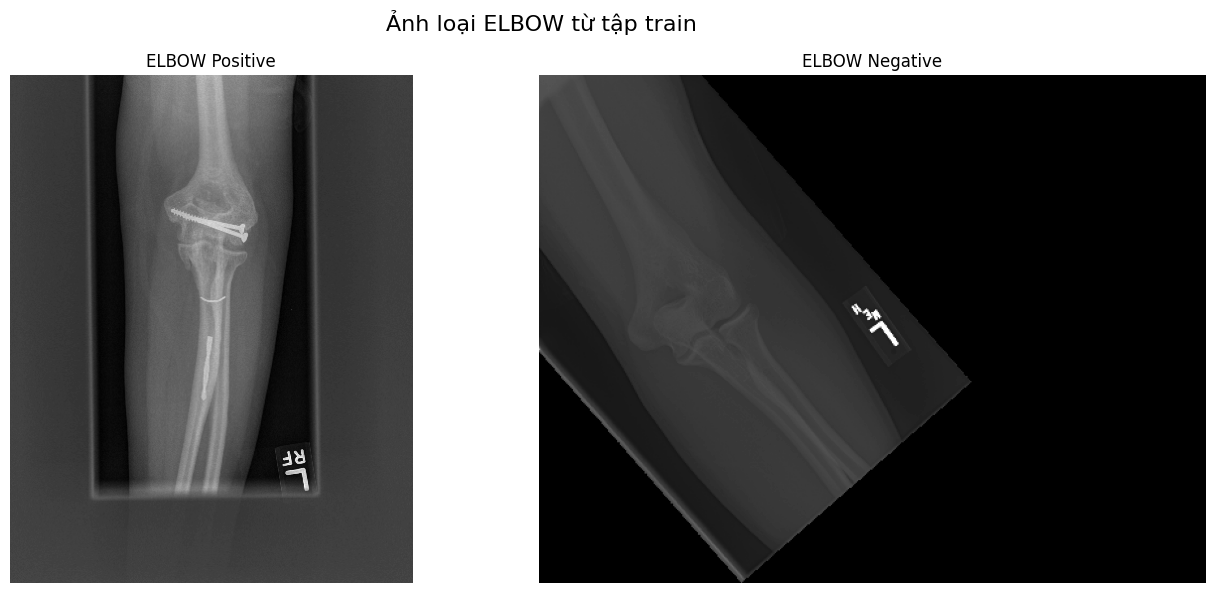

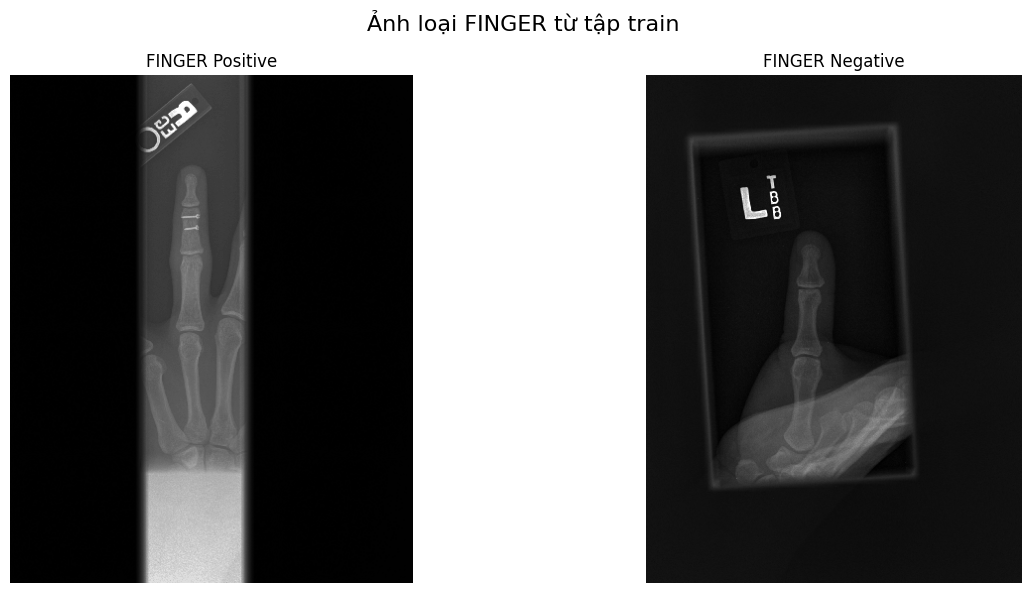

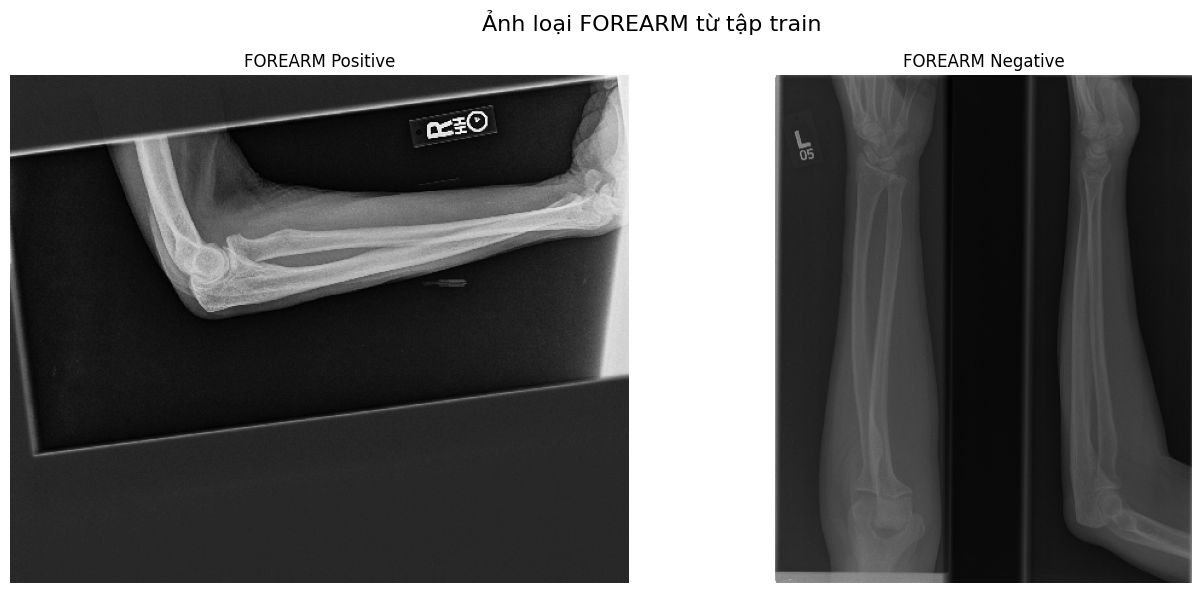

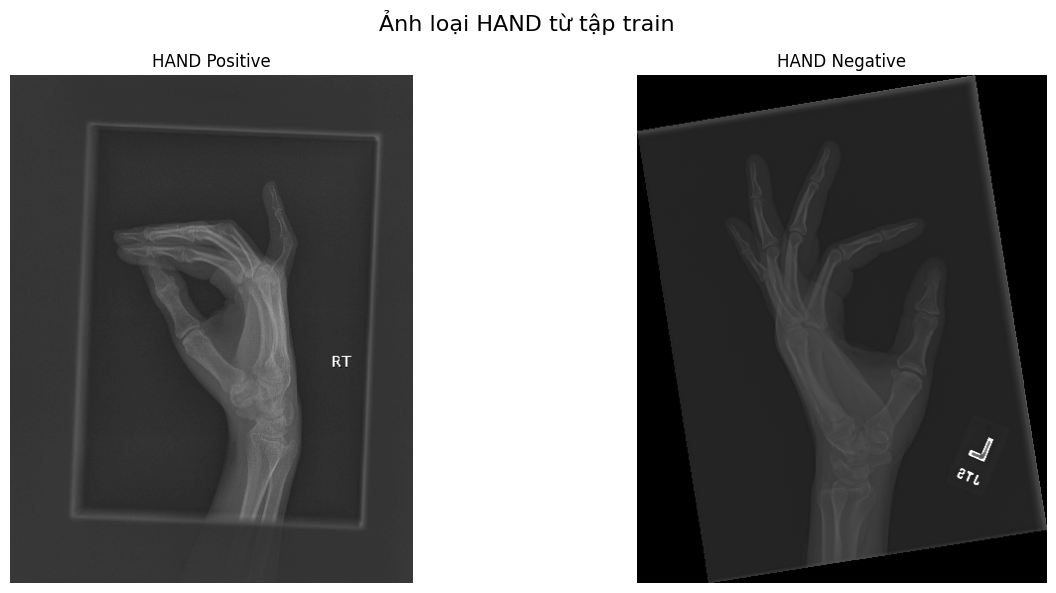

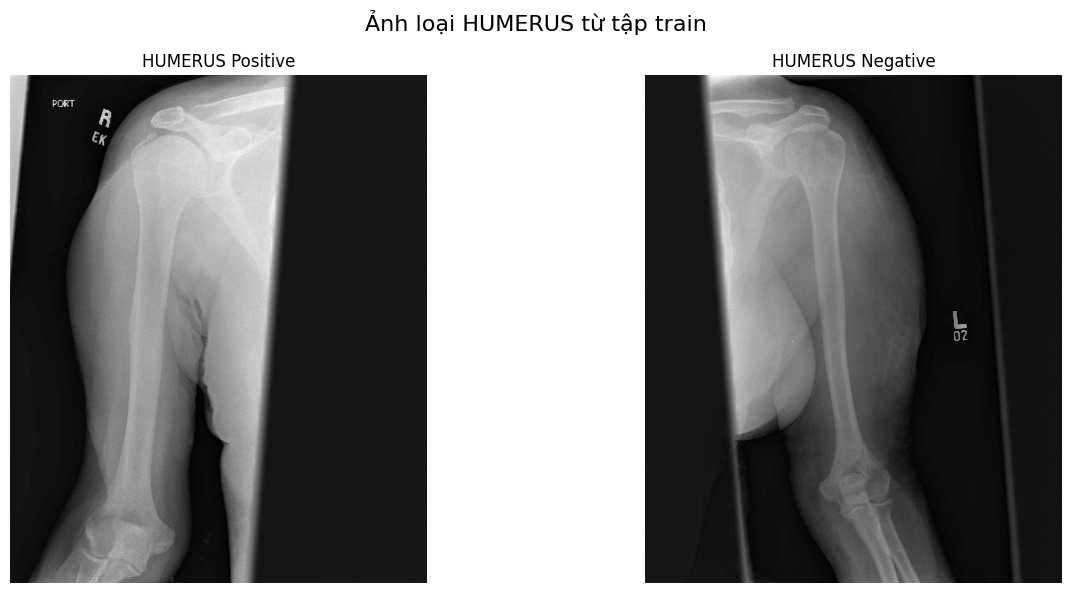

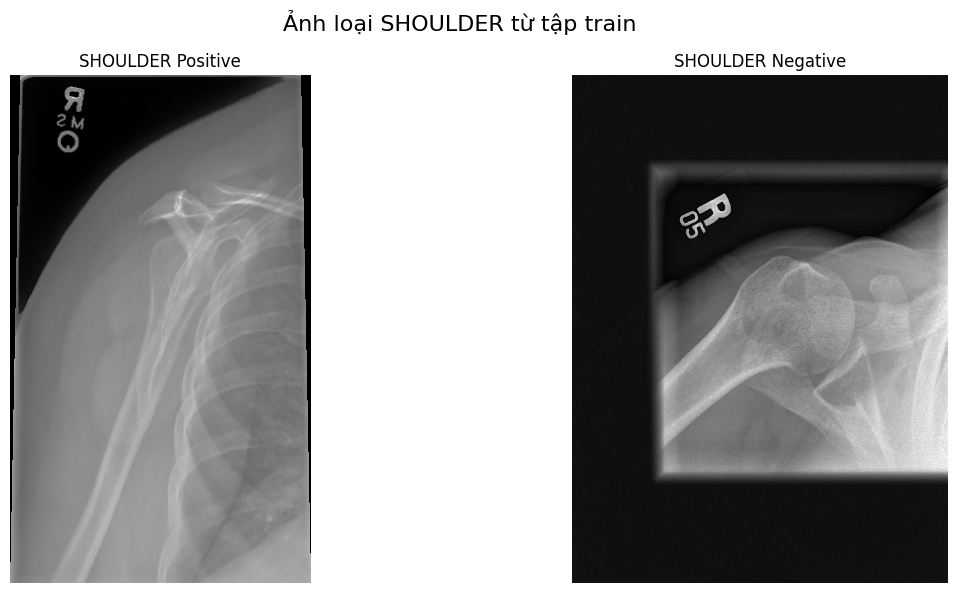

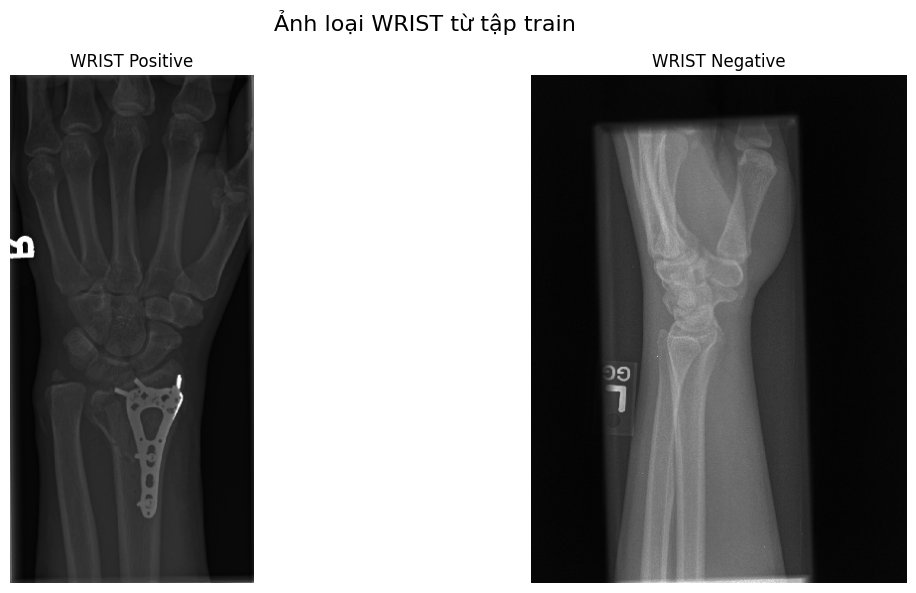

In [14]:
# Hiển thị 1 ảnh bình thường và 1 ảnh bất thường của từng loại xương từ tập train 
for t in types:
    # Lấy 1 ảnh bất thường
    positive_imgs = train_image_paths[
        (train_image_paths['path'].str.contains(f'XR_{t}', na=False)) & 
        (train_image_paths['path'].str.contains('_positive', na=False))
    ]['path'].head(2).tolist()
    
    # Lấy 1 ảnh bình thường
    negative_imgs = train_image_paths[
        (train_image_paths['path'].str.contains(f'XR_{t}', na=False)) & 
        (train_image_paths['path'].str.contains('_negative', na=False))
    ]['path'].head(2).tolist()
    
    # Hiển thị ảnh
    plt.figure(figsize=(14, 6))
    
    # 1 ảnh bất thường
    for i, img_path in enumerate(positive_imgs):
        img = cv2.imread(('data/' + img_path), 0)
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'{t} Positive')
        plt.axis('off')
    
    # 1 ảnh bình thường
    for i, img_path in enumerate(negative_imgs):
        img = cv2.imread(('data/' + img_path), 0)
        plt.subplot(1, 2, 2)
        plt.imshow(img, cmap='gray')
        plt.title(f'{t} Negative')
        plt.axis('off')
    
    plt.suptitle(f'Ảnh loại {t} từ tập train', fontsize=16)
    plt.tight_layout()
    plt.show()

**Nhận xét:**

1. Sự đa dạng về góc chụp và hướng xương

- Ảnh FOREARM Positive (nằm ngang) so với FOREARM Negative (nằm dọc). Hoặc ảnh ELBOW Negative bị xoay một góc chéo so với ELBOW Positive.

- Thách thức: Nếu đưa trực tiếp vào mô hình, máy sẽ học sai đặc trưng (ví dụ: học rằng "xương nằm ngang là gãy").

- Giải pháp: Cần kỹ thuật Data Augmentation (Xoay/Lật) mạnh mẽ để mô hình học được tính bất biến (invariance) đối với hướng xoay.

2. Vấn đề 2: Độ tương phản thấp và "cháy" sáng

- Ảnh HUMERUS Positive và SHOULDER Positive có vùng xương vai rất mờ, lẫn vào mô mềm. Ngược lại, ảnh WRIST Positive có độ tương phản cao hơn nhưng nẹp kim loại (màu trắng sáng) gây chói.

- Thách thức: Mô hình CNN rất dễ bị "đánh lừa" bởi các vùng quá sáng hoặc quá tối mà bỏ qua đường gãy nhỏ.

- Giải pháp: Bắt buộc áp dụng CLAHE để cân bằng lại ánh sáng cục bộ, giúp xương vai hiện rõ vân xương (trabeculae) hơn mà không làm "cháy" vùng có nẹp kim loại.

3. Vấn đề 3: Tỷ lệ khung hình khác nhau

- Ảnh FINGER và FOREARM rất dài và hẹp (hình chữ nhật đứng), trong khi ảnh SHOULDER gần như hình vuông.

- Thách thức: Các mô hình DenseNet/YOLO thường yêu cầu đầu vào vuông. Nếu resize trực tiếp, xương ngón tay sẽ bị "ép" ngắn lại hoặc bè ra, làm mất đặc trưng gãy xương.

- Giải pháp: Sử dụng kỹ thuật Padding (thêm viền đen) để giữ nguyên tỷ lệ xương gốc.

### 2.3.4 Lấy dữ liệu để gán nhãn

In [15]:
# Liệt kê giúp mình mỗi đường dẫn ảnh của mỗi loại xương, mỗi loại xương lấy 100 ảnh là positive tổng là 700 ảnh, lưu những đường dẫn đó vào file csv
bone_types = ['ELBOW', 'FINGER', 'FOREARM', 'HAND', 'HUMERUS', 'SHOULDER', 'WRIST']
selected_image_paths = []
for bone in bone_types:
    bone_positive_images = train_image_paths[
        (train_image_paths['path'].str.contains(f'XR_{bone}')) & 
        (train_image_paths['path'].str.contains('_positive'))
    ]
    selected_images = bone_positive_images.head(100)
    selected_image_paths.extend(selected_images['path'].tolist())
# Lưu vào file CSV
selected_image_paths_df = pd.DataFrame(selected_image_paths, columns=['path'])
selected_image_paths_df.to_csv("selected_positive_image_paths.csv", index=False)


In [16]:
# lấy đường dẫn ảnh từ file csv vừa lưu để lưu những ảnh này vào thư mục mới named_positive_images
# đổi tên ảnh theo thứ tự 1,2,3,...
import shutil
selected_image_paths_df = pd.read_csv("selected_positive_image_paths.csv")
output_dir = "named_positive_images/"
os.makedirs(output_dir, exist_ok=True)
for idx, row in selected_image_paths_df.iterrows():
    src_path = "data/" + row['path']
    dst_path = os.path.join(output_dir, f"{idx + 1}.png")
    shutil.copy(src_path, dst_path)
print(f"Đã sao chép {len(selected_image_paths_df)} ảnh vào thư mục {output_dir}")
print("Hoàn thành!")

Đã sao chép 700 ảnh vào thư mục named_positive_images/
Hoàn thành!


# 3. Tiền xử lý dữ liệu